<a href="https://colab.research.google.com/github/kaline/LPDS-IFCE/blob/master/Limiariza%C3%A7%C3%A3oExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os limiares intermediários são:
[118, 101, 91, 88, 87]


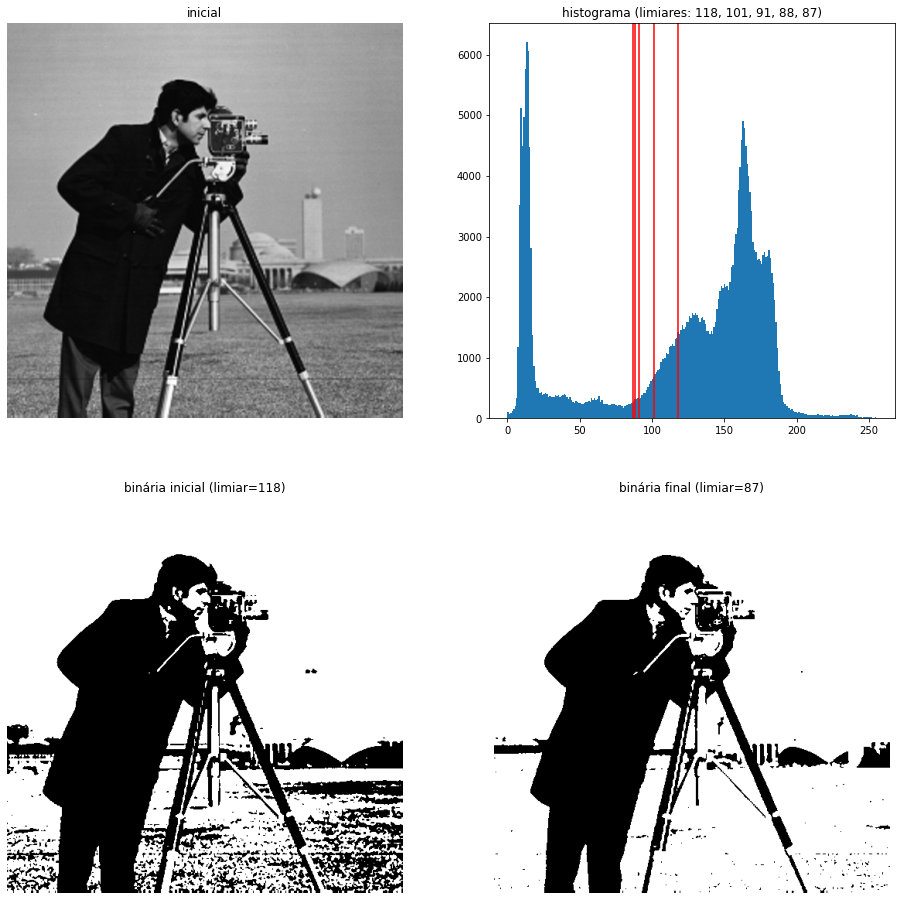

In [28]:
#   Limiarização pelo cálculo iterativo de médias

from skimage import io
from skimage import img_as_uint
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

imagem = data.camera()
largura, altura = imagem.shape

#--- Calcula Limiar

limite_dif = 2
limiar = np.mean(imagem)
limiares = [int(limiar)]

while True:
    media_backgrd = imagem[imagem < limiar].mean()
    media_foregrd = imagem[imagem >= limiar].mean()

    novo_limiar = np.mean([media_backgrd, media_foregrd])
              
    limiares.append(int(novo_limiar))
    if (np.abs(limiar - novo_limiar) < limite_dif) :
        break
    else:
        limiar = novo_limiar

print('Os limiares intermediários são:')
print(limiares)

#--- Exibe Resultados

imagem_binaria = (imagem > novo_limiar).astype('uint8')*255
io.imsave("imagem-binaria.png", imagem_binaria)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 16))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3)
ax[3] = plt.subplot(2, 2, 4)

ax[0].imshow(imagem, cmap=plt.cm.gray)
ax[0].set_title('inicial')
ax[0].axis('off')

ax[1].hist(imagem.ravel(), bins=256)
for limiar in limiares:
    ax[1].axvline(limiar, color='r')
ax[1].set_title('histograma (limiares: '+str(limiares)[1:-1]+')')

limiar = limiares[0] # primeiro limiar calculado
imagem_binaria = (imagem > limiar).astype('uint8')*255
ax[2].imshow(imagem_binaria, cmap=plt.cm.gray)
ax[2].set_title('binária inicial (limiar='+str(limiar)+')')
ax[2].axis('off')

limiar = limiares[-1] # último limiar calculado
imagem_binaria = (imagem > limiar).astype('uint8')*255
ax[3].imshow(imagem_binaria, cmap=plt.cm.gray)
ax[3].set_title('binária final (limiar='+str(limiar)+')')
ax[3].axis('off')


plt.show()